<a href="https://colab.research.google.com/github/marivic9/EDA-CS-103/blob/main/Exer_1_Amuan.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [75]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [76]:
!pip install mailbox

In [77]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [78]:
import mailbox
mboxfile = "/content/drive/My Drive/Colab Notebooks/Exer 1 - Amuan/marivic.mbox"

mbox = mailbox.mbox(mboxfile)
mbox

In [79]:
for key in mbox[0].keys():
  print(key)

X-GM-THRID
X-Gmail-Labels
Delivered-To
Received
X-Google-Smtp-Source
X-Received
ARC-Seal
ARC-Message-Signature
ARC-Authentication-Results
Return-Path
Received
Received-SPF
Authentication-Results
X-MSFBL
DKIM-Signature
To
Content-Type
MIME-Version
X-Mailgun-Variables
X-Auto-Response-Suppress
Reply-To
X-Intercom-App-Id
X-Intercom-Bin
List-Unsubscribe-Post
Message-ID
X-Report-Abuse
Subject
From
List-Unsubscribe
Date


In [80]:
import csv

with open('mailbox.csv', 'w') as outputfile:
  writer = csv.writer(outputfile)
  writer.writerow(['subject','from','date','to','label','thread'])

  for message in mbox:
    writer.writerow([message['subject'], message['from'],  message['date'], message['to'],  message['X-Gmail-Labels'], message['X-GM-THRID']])

In [81]:
dfs = pd.read_csv('mailbox.csv', names=['subject', 'from', 'date', 'to', 'label', 'thread'])

In [82]:
dfs.dtypes

,0
subject,object
from,object
date,object
to,object
label,object
thread,object


In [83]:
dfs['date'] = dfs['date'].apply(lambda x: pd.to_datetime(x, errors='coerce', utc=True))

In [84]:
dfs = dfs[dfs['date'].notna()]

In [85]:
dfs.to_csv('gmail.csv')

In [86]:
dfs.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1320 entries, 1 to 1320
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype              
---  ------   --------------  -----              
 0   subject  1219 non-null   object             
 1   from     1320 non-null   object             
 2   date     1320 non-null   datetime64[ns, UTC]
 3   to       1318 non-null   object             
 4   label    1320 non-null   object             
 5   thread   1320 non-null   object             
dtypes: datetime64[ns, UTC](1), object(5)
memory usage: 72.2+ KB


In [87]:
dfs.head(10)

,subject,from,date,to,label,thread
1,=?utf-8?B?UkU6IEknbSBET05FIPCfp6Dwn6SvIEF1dG9t...,"""BLACKBOX Team"" <team@blackbox.chat>",2024-07-02 08:50:26+00:00,marivic.amuan@students.isatu.edu.ph,"Inbox,Category Promotions,Unread",1803456586526137276
2,"Debug less, design more: Software architecture...",Fahim ul Haq <fahim.u@educative.io>,2024-07-23 08:57:29+00:00,marivic.amuan@students.isatu.edu.ph,"Inbox,Category Promotions,Unread",1805359565473352583
3,Security alert,Google <no-reply@accounts.google.com>,2024-09-05 00:05:55+00:00,marivic.amuan@students.isatu.edu.ph,"Inbox,Category Updates,Unread",1809312390792329276
4,New Course: Introduction to Kubernetes,DataCamp Insights <team@datacamp.com>,2024-07-30 19:20:23+00:00,marivic.amuan@students.isatu.edu.ph,"Inbox,Category Promotions,Unread",1806032935011916843
5,=?utf-8?B?8J+OiSBZb3UgZ2V0IFZJUCBhY2Nlc3MgdG8g...,"""BLACKBOX Team"" <team@blackbox.chat>",2024-07-29 02:22:44+00:00,marivic.amuan@students.isatu.edu.ph,"Inbox,Category Updates,Unread",1805878312872004924
6,Ready to do your best work?,Canva <marketing@engage.canva.com>,2024-09-23 04:17:58+00:00,marivic.amuan@students.isatu.edu.ph,"Inbox,Category Promotions,Unread",1810958994332911583
7,Security alert,Google <no-reply@accounts.google.com>,2024-09-19 00:38:22+00:00,marivic.amuan@students.isatu.edu.ph,"Inbox,Category Updates,Unread",1810582789463995392
8,12 GenAI skills every dev should know in 2024,Fahim at Educative <fahim.u@educative.io>,2024-09-10 08:53:11+00:00,marivic.amuan@students.isatu.edu.ph,"Inbox,Category Updates,Unread",1809798547132324057
9,A Meta hiring manager's guide to take-home cod...,Fahim at Educative <fahim.u@educative.io>,2024-07-03 08:56:32+00:00,marivic.amuan@students.isatu.edu.ph,"Inbox,Category Updates,Unread",1803547566916626152
10,"@vicxrsha, check out the notifications you hav...",Twitter <notify@twitter.com>,2024-06-23 23:08:08+00:00,=?UTF-8?Q?kyoshi_=E8=99=9A=E5=AD=90?= <marivic...,"Inbox,Category Social,Unread",1802695174896253437


In [88]:
dfs.columns

Index(['subject', 'from', 'date', 'to', 'label', 'thread'], dtype='object')

In [89]:
import re

def extract_email_ID(string):
  email = re.findall(r'<(.+?)>', string)
  if not email:
    email = list(filter(lambda y: '@' in y, string.split()))
  return email[0] if email else np.nan

In [90]:
dfs['from'] = dfs['from'].apply(lambda x: extract_email_ID(x))

In [91]:
myemail = 'itsmeskm99@gmail.com'
dfs['label'] = dfs['from'].apply(lambda x: 'sent' if x==myemail else 'inbox')

In [92]:
dfs.drop(columns='to', inplace=True)

In [93]:
dfs.head(10)

,subject,from,date,label,thread
1,=?utf-8?B?UkU6IEknbSBET05FIPCfp6Dwn6SvIEF1dG9t...,team@blackbox.chat,2024-07-02 08:50:26+00:00,inbox,1803456586526137276
2,"Debug less, design more: Software architecture...",fahim.u@educative.io,2024-07-23 08:57:29+00:00,inbox,1805359565473352583
3,Security alert,no-reply@accounts.google.com,2024-09-05 00:05:55+00:00,inbox,1809312390792329276
4,New Course: Introduction to Kubernetes,team@datacamp.com,2024-07-30 19:20:23+00:00,inbox,1806032935011916843
5,=?utf-8?B?8J+OiSBZb3UgZ2V0IFZJUCBhY2Nlc3MgdG8g...,team@blackbox.chat,2024-07-29 02:22:44+00:00,inbox,1805878312872004924
6,Ready to do your best work?,marketing@engage.canva.com,2024-09-23 04:17:58+00:00,inbox,1810958994332911583
7,Security alert,no-reply@accounts.google.com,2024-09-19 00:38:22+00:00,inbox,1810582789463995392
8,12 GenAI skills every dev should know in 2024,fahim.u@educative.io,2024-09-10 08:53:11+00:00,inbox,1809798547132324057
9,A Meta hiring manager's guide to take-home cod...,fahim.u@educative.io,2024-07-03 08:56:32+00:00,inbox,1803547566916626152
10,"@vicxrsha, check out the notifications you hav...",notify@twitter.com,2024-06-23 23:08:08+00:00,inbox,1802695174896253437


In [94]:
import datetime
import pytz

def refactor_timezone(x):
  est = pytz.timezone('US/Eastern')
  return x.astimezone(est)

In [95]:
dfs['date'] = dfs['date'].apply(lambda x: refactor_timezone(x))

In [97]:
dfs['dayofweek'] = dfs['date'].apply(lambda x: x.day_name()) # Use day_name() to get the day of the week
dfs['dayofweek'] = pd.Categorical(dfs['dayofweek'], categories=[
    'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday',
    'Saturday', 'Sunday'], ordered=True)

In [96]:
dfs['timeofday'] = dfs['date'].apply(lambda x: x.hour + x.minute/60 + x.second/3600)

In [38]:
dfs['hour'] = dfs['date'].apply(lambda x: x.hour)

In [39]:
dfs['year_int'] = dfs['date'].apply(lambda x: x.year)

In [40]:
dfs['year'] = dfs['date'].apply(lambda x: x.year + x.dayofyear/365.25)

In [41]:
dfs.index = dfs['date']
del dfs['date']

In [42]:
print(dfs.index.min().strftime('%a, %d %b %Y %I:%M %p'))
print(dfs.index.max().strftime('%a, %d %b %Y %I:%M %p'))

print(dfs['label'].value_counts())

Thu, 18 Aug 2022 11:16 PM
Wed, 25 Sep 2024 08:17 PM
label
inbox    1320
Name: count, dtype: int64


In [43]:
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator

In [44]:
def plot_todo_vs_year(df, ax, color='C0', s=0.5, title=''):
  ind = np.zeros(len(df), dtype='bool')
  est = pytz.timezone('US/Eastern')

  df[~ind].plot.scatter('year', 'timeofday', s=s, alpha=0.6, ax=ax, color=color)
  ax.set_ylim(0, 24)
  ax.yaxis.set_major_locator(MaxNLocator(8))
  ax.set_yticklabels([datetime.datetime.strptime(str(int(np.mod(ts, 24))), "%H").strftime("%I %p") for ts in ax.get_yticks()]);

  ax.set_xlabel('')
  ax.set_ylabel('')
  ax.set_title(title)
  ax.grid(ls=':', color='k')

  return ax

In [45]:
sent = dfs[dfs['label']=='sent']
received = dfs[dfs['label']=='inbox']

<ipython-input-44-725e438063d6>:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([datetime.datetime.strptime(str(int(np.mod(ts, 24))), "%H").strftime("%I %p") for ts in ax.get_yticks()]);
<ipython-input-44-725e438063d6>:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([datetime.datetime.strptime(str(int(np.mod(ts, 24))), "%H").strftime("%I %p") for ts in ax.get_yticks()]);


<Axes: title={'center': 'Received'}>

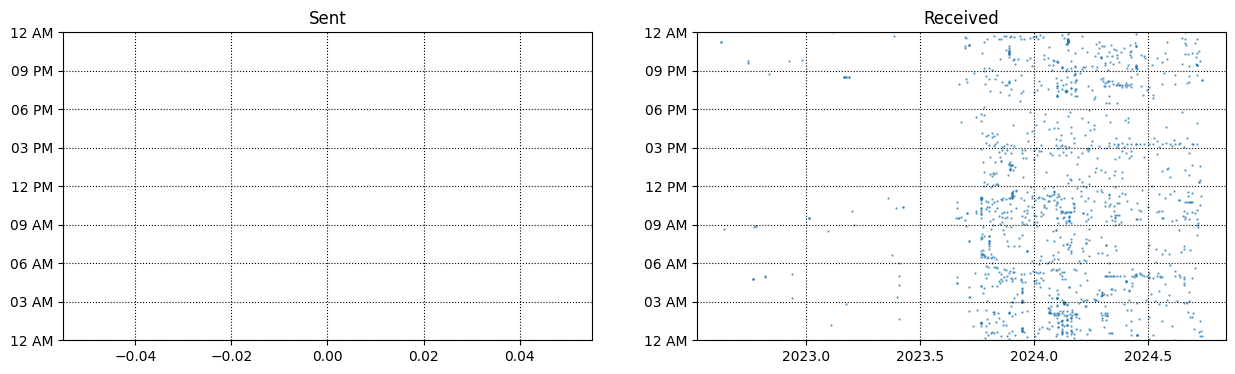

In [46]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15, 4))

plot_todo_vs_year(sent, ax[0], title='Sent')
plot_todo_vs_year(received, ax[1], title='Received')

In [47]:
def plot_number_perday_per_year(df, ax, label=None, dt=0.3, **plot_kwargs):
    year = df[df['year'].notna()]['year'].values
    T = year.max() - year.min()
    bins = int(T / dt)
    weights = 1 / (np.ones_like(year) * dt * 365.25)
    ax.hist(year, bins=bins, weights=weights, label=label, **plot_kwargs);
    ax.grid(ls=':', color='k')

In [49]:
from scipy import ndimage

def plot_number_perdhour_per_year(df, ax, label=None, dt=1, smooth=False,
                      weight_fun=None, **plot_kwargs):

    tod = df[df['timeofday'].notna()]['timeofday'].values
    year = df[df['year'].notna()]['year'].values
    Ty = year.max() - year.min()
    T = tod.max() - tod.min()
    bins = int(T / dt)
    if weight_fun is None:
        weights = 1 / (np.ones_like(tod) * Ty * 365.25 / dt)
    else:
        weights = weight_fun(df)
    if smooth:
        hst, xedges = np.histogram(tod, bins=bins, weights=weights);
        x = np.delete(xedges, -1) + 0.5*(xedges[1] - xedges[0])
        hst = ndimage.gaussian_filter(hst, sigma=0.75)
        f = interp1d(x, hst, kind='cubic')
        x = np.linspace(x.min(), x.max(), 10000)
        hst = f(x)
        ax.plot(x, hst, label=label, **plot_kwargs)
    else:
        ax.hist(tod, bins=bins, weights=weights, label=label, **plot_kwargs);


    ax.grid(ls=':', color='k')
    orientation = plot_kwargs.get('orientation')
    if orientation is None or orientation == 'vertical':
        ax.set_xlim(0, 24)
        ax.xaxis.set_major_locator(MaxNLocator(8))
        ax.set_xticklabels([datetime.datetime.strptime(str(int(np.mod(ts, 24))), "%H").strftime("%I %p")
                            for ts in ax.get_xticks()]);
    elif orientation == 'horizontal':
        ax.set_ylim(0, 24)
        ax.yaxis.set_major_locator(MaxNLocator(8))
        ax.set_yticklabels([datetime.datetime.strptime(str(int(np.mod(ts, 24))), "%H").strftime("%I %p")
                            for ts in ax.get_yticks()]);

In [50]:
class TriplePlot:
  def __init__(self):
    gs = gridspec.GridSpec(6, 6)
    self.ax1 = plt.subplot(gs[2:6, :4])
    self.ax2 = plt.subplot(gs[2:6, 4:6], sharey=self.ax1)
    plt.setp(self.ax2.get_yticklabels(), visible=False);
    self.ax3 = plt.subplot(gs[:2, :4])
    plt.setp(self.ax3.get_xticklabels(), visible=False);

  def plot(self, df, color='darkblue', alpha=0.8, markersize=0.5, yr_bin=0.1, hr_bin=0.5):
    plot_todo_vs_year(df, self.ax1, color=color, s=markersize)
    plot_number_perdhour_per_year(df, self.ax2, dt=hr_bin, color=color, alpha=alpha, orientation='horizontal')
    self.ax2.set_xlabel('Average emails per hour')
    plot_number_perday_per_year(df, self.ax3, dt=yr_bin, color=color, alpha=alpha)
    self.ax3.set_ylabel('Average emails per day')

<ipython-input-44-725e438063d6>:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([datetime.datetime.strptime(str(int(np.mod(ts, 24))), "%H").strftime("%I %p") for ts in ax.get_yticks()]);
<ipython-input-49-99d4591ab3fd>:37: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([datetime.datetime.strptime(str(int(np.mod(ts, 24))), "%H").strftime("%I %p")


DataFrame is empty, skipping plot.


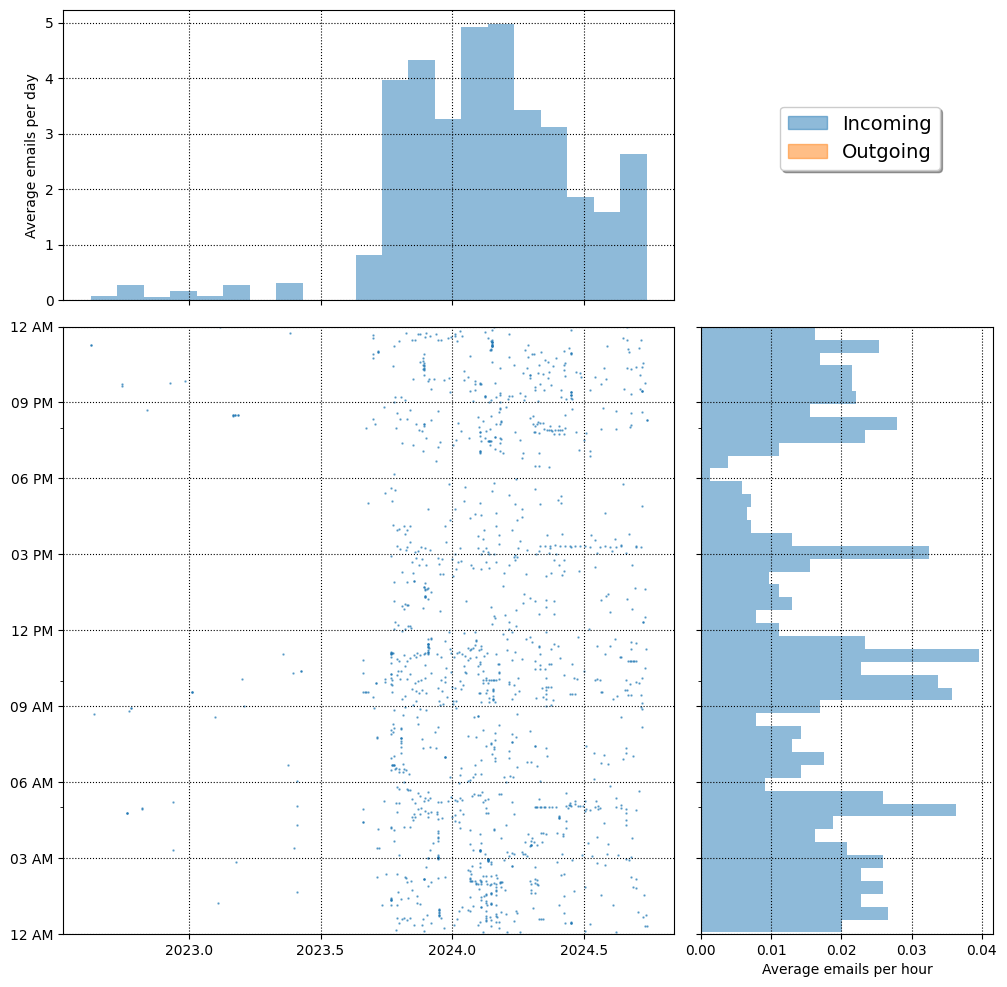

In [52]:
import matplotlib.gridspec as gridspec
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt
import numpy as np
from scipy import ndimage
from scipy.interpolate import interp1d
from matplotlib.ticker import MaxNLocator
import datetime


class TriplePlot:
  def __init__(self):
    gs = gridspec.GridSpec(6, 6)
    self.ax1 = plt.subplot(gs[2:6, :4])
    self.ax2 = plt.subplot(gs[2:6, 4:6], sharey=self.ax1)
    plt.setp(self.ax2.get_yticklabels(), visible=False);
    self.ax3 = plt.subplot(gs[:2, :4])
    plt.setp(self.ax3.get_xticklabels(), visible=False);

  def plot(self, df, color='darkblue', alpha=0.8, markersize=0.5, yr_bin=0.1, hr_bin=0.5):
    # Check if df is empty
    if df.empty:
      print("DataFrame is empty, skipping plot.")
      return

    plot_todo_vs_year(df, self.ax1, color=color, s=markersize)

    # Check if year column has any non-NaN values
    if df['year'].notna().any():
      plot_number_perdhour_per_year(df, self.ax2, dt=hr_bin, color=color, alpha=alpha, orientation='horizontal')
      self.ax2.set_xlabel('Average emails per hour')
    else:
      print("No valid year data, skipping plot_number_perdhour_per_year.")

    # Check if timeofday column has any non-NaN values
    if df['timeofday'].notna().any():
      plot_number_perday_per_year(df, self.ax3, dt=yr_bin, color=color, alpha=alpha)
      self.ax3.set_ylabel('Average emails per day')
    else:
      print("No valid timeofday data, skipping plot_number_perday_per_year.")

plt.figure(figsize=(12,12));
tpl = TriplePlot()

tpl.plot(received, color='C0', alpha=0.5)
tpl.plot(sent, color='C1', alpha=0.5)
p1 = mpatches.Patch(color='C0', label='Incoming', alpha=0.5)
p2 = mpatches.Patch(color='C1', label='Outgoing', alpha=0.5)
plt.legend(handles=[p1, p2], bbox_to_anchor=[1.45, 0.7], fontsize=14, shadow=True);

<Axes: xlabel='dayofweek'>

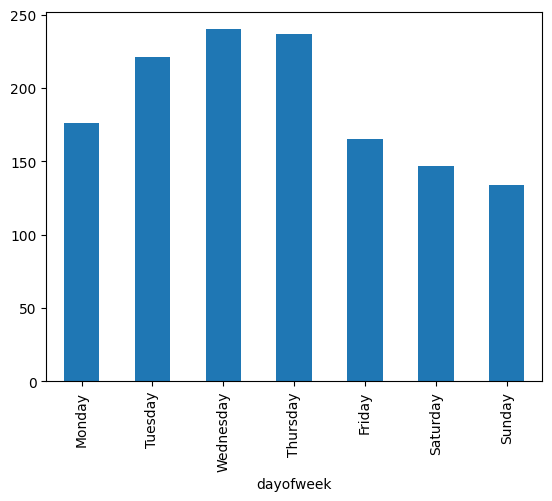

In [53]:
counts = dfs.dayofweek.value_counts(sort=False)
counts.plot(kind='bar')

In [54]:
addrs = received['from'].value_counts()

addrs[0:4]

,count
from,
info@twitter.com,271
marivic.amuan@students.isatu.edu.ph,130
fahim.u@educative.io,86
notify@twitter.com,83


<ipython-input-44-725e438063d6>:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([datetime.datetime.strptime(str(int(np.mod(ts, 24))), "%H").strftime("%I %p") for ts in ax.get_yticks()]);
<ipython-input-49-99d4591ab3fd>:37: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([datetime.datetime.strptime(str(int(np.mod(ts, 24))), "%H").strftime("%I %p")
<ipython-input-44-725e438063d6>:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([datetime.datetime.strptime(str(int(np.mod(ts, 24))), "%H").strftime("%I %p") for ts in ax.get_yticks()]);
<ipython-input-49-99d4591ab3fd>:37: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([datetime.datetime.strptime(str(int(np.mod(ts, 24))), "%H").strftime("%I %p")
<ipython-input-44-725e438063d6>:8: UserWarning: FixedFormatter should only be used together with FixedLo

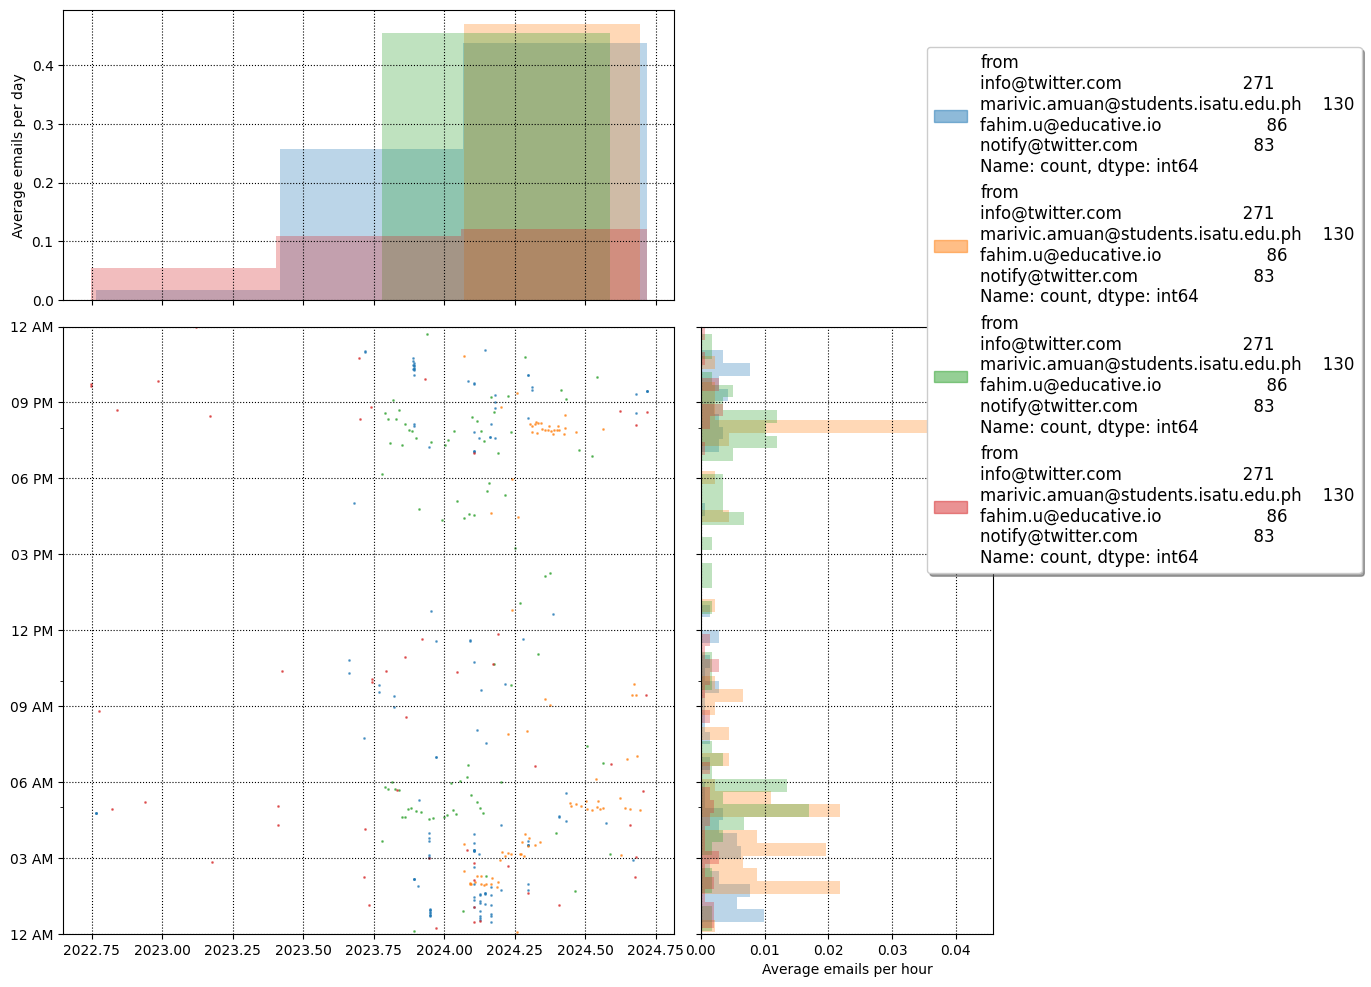

In [55]:
plt.figure(figsize=(12,12));

tpl = TriplePlot()

labels = []
colors = ['C{}'.format(ii) for ii in range(9)]
idx = np.array([1,2,3,7])
for ct, addr in enumerate(addrs.index[idx]):
    tpl.plot(dfs[dfs['from'] == addr], color=colors[ct], alpha=0.3, yr_bin=0.5, markersize=1.0)
    labels.append(mpatches.Patch(color=colors[ct], label=addrs[0:4], alpha=0.5))
plt.legend(handles=labels, bbox_to_anchor=[1.4, 0.9], fontsize=12, shadow=True);

<ipython-input-56-c5abe68ebf9d>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  sdw = sent.groupby('dayofweek').size() / len(sent)
<ipython-input-56-c5abe68ebf9d>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  rdw = received.groupby('dayofweek').size() / len(received)


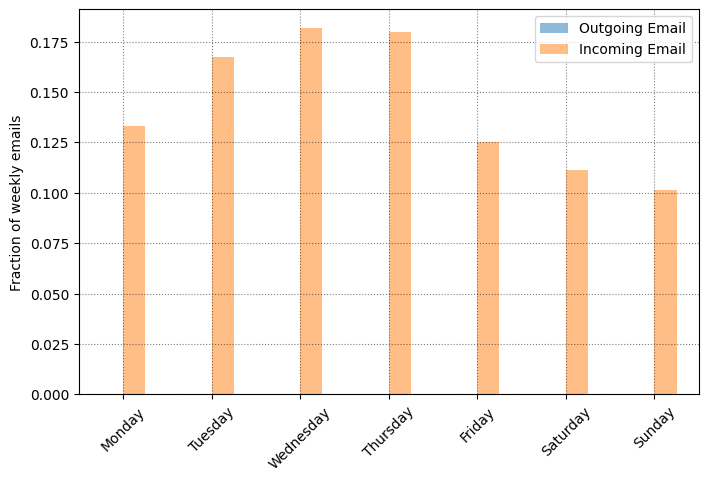

In [56]:
sdw = sent.groupby('dayofweek').size() / len(sent)
rdw = received.groupby('dayofweek').size() / len(received)

df_tmp = pd.DataFrame(data={'Outgoing Email': sdw, 'Incoming Email':rdw})
df_tmp.plot(kind='bar', rot=45, figsize=(8,5), alpha=0.5)
plt.xlabel('');
plt.ylabel('Fraction of weekly emails');
plt.grid(ls=':', color='k', alpha=0.5)

<ipython-input-49-99d4591ab3fd>:32: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([datetime.datetime.strptime(str(int(np.mod(ts, 24))), "%H").strftime("%I %p")


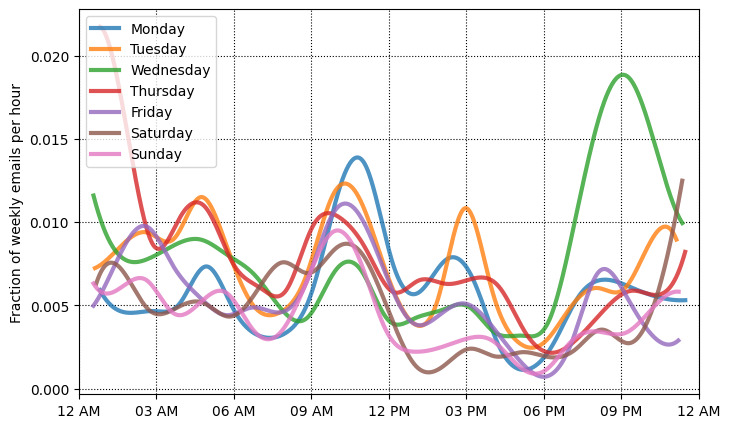

In [59]:
import scipy.ndimage
from scipy.interpolate import interp1d

plt.figure(figsize=(8,5))
ax = plt.subplot(111)
for ct, dow in enumerate(dfs.dayofweek.cat.categories):
    df_r = received[received['dayofweek']==dow]
    weights = np.ones(len(df_r)) / len(received)
    wfun = lambda x: weights
    plot_number_perdhour_per_year(df_r, ax, dt=1, smooth=True, color=f'C{ct}',
                      alpha=0.8, lw=3, label=dow, weight_fun=wfun)

    df_s = sent[sent['dayofweek']==dow]
    if not df_s.empty: # Check to see if the dataframe is empty
        weights = np.ones(len(df_s)) / len(sent)
        wfun = lambda x: weights
        plot_number_perdhour_per_year(df_s, ax, dt=1, smooth=True, color=f'C{ct}',
                          alpha=0.8, lw=2, label=dow, ls='--', weight_fun=wfun)
ax.set_ylabel('Fraction of weekly emails per hour')
plt.legend(loc='upper left')

In [70]:
from wordcloud import WordCloud

df_no_arxiv = dfs[dfs['from'] != 'no-reply@arXiv.org']
text = ' '.join(map(str, received['subject'].values))

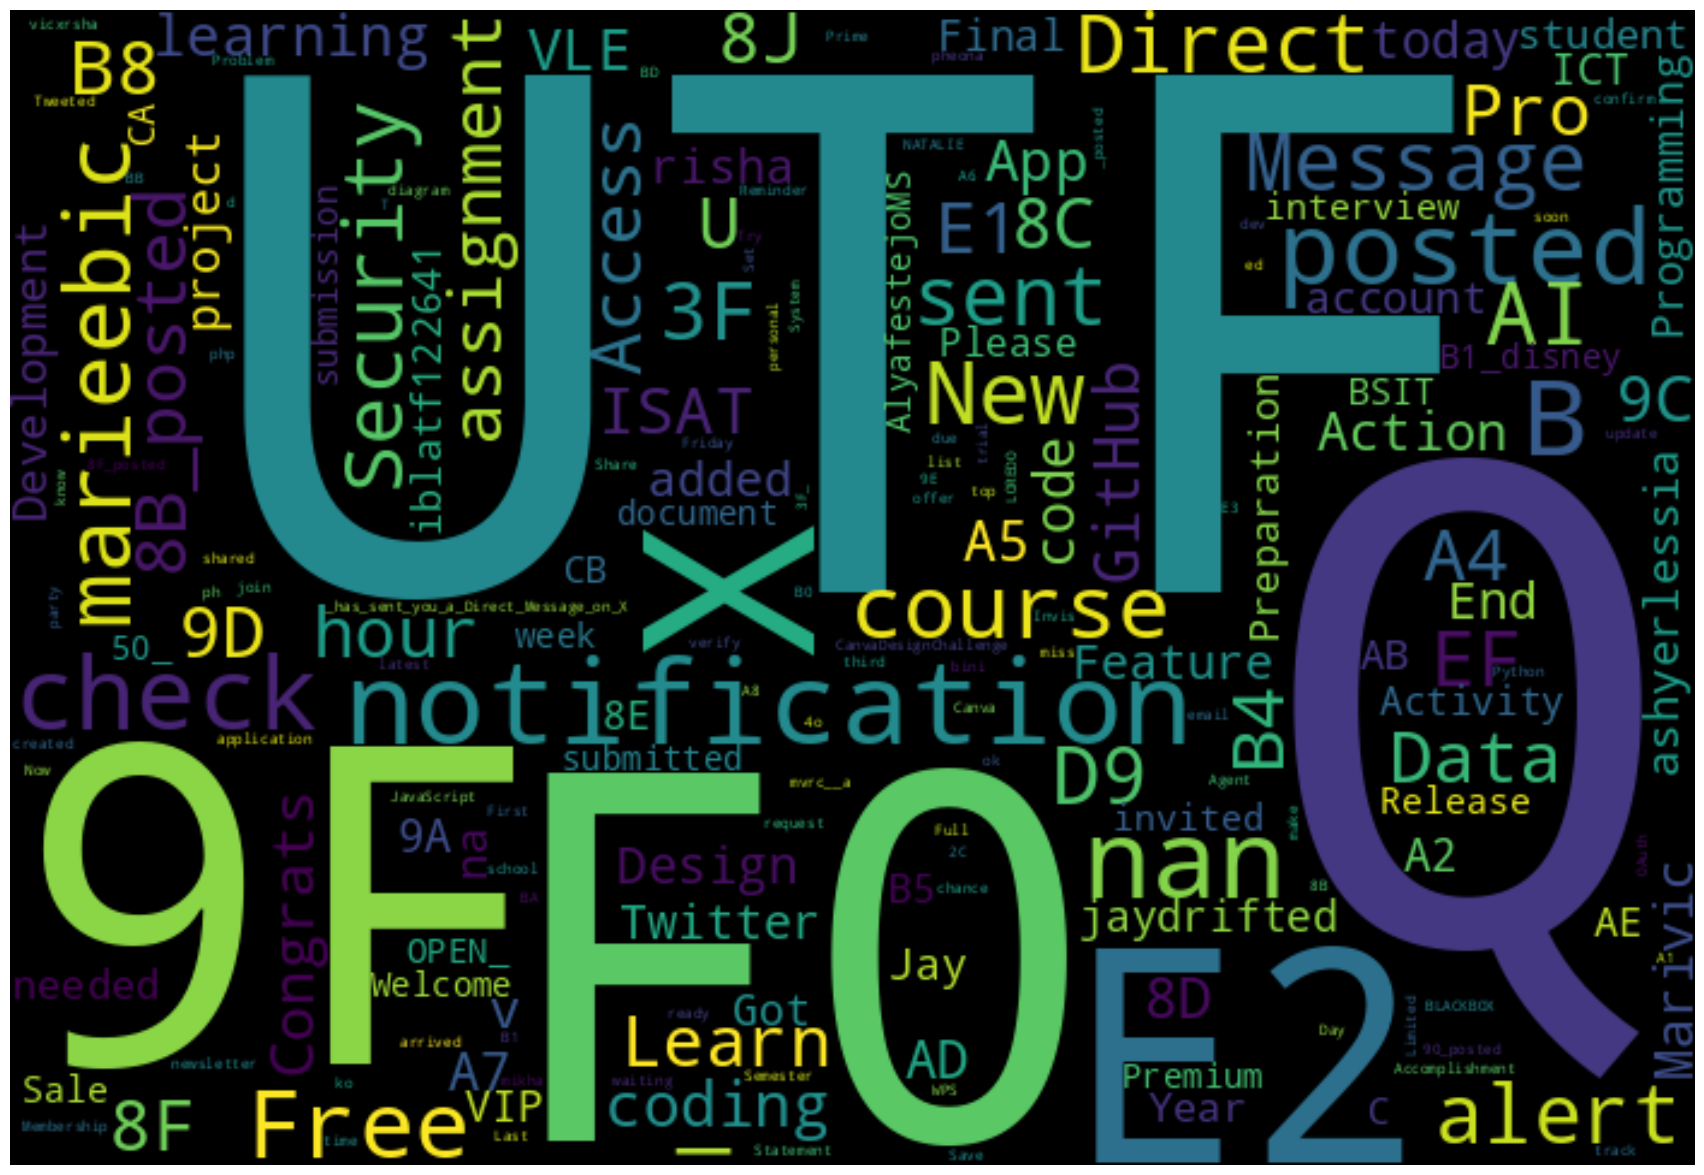

In [71]:
stopwords = ['Re', 'Fwd', '3A_']
wrd = WordCloud(width=700, height=480, margin=0, collocations=False)
for sw in stopwords:
    wrd.stopwords.add(sw)
wordcloud = wrd.generate(text)

plt.figure(figsize=(25,15))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.margins(x=0, y=0)